In [906]:
cd '/content/drive/My Drive/data'

/content/drive/My Drive/data


In [907]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Home B**

In [908]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk         
import scipy.stats as scp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from xgboost import XGBRegressor

dataB_w=pd.read_csv('Home B - 2014/homeB2014.csv')
dataB=pd.read_csv('Home B - 2014/HomeB-meter1_2014.csv')

dataB['Total Consumption']=dataB.sum(axis = 1, skipna = True) 
data_weather=dataB_w.copy()
#data_weather['time'] = pd.to_datetime(data_weather['time'],unit='s')
#data_weather['time'] = pd.to_datetime(data_weather['time']) - timedelta(hours=4.5)

dataB_w['time'] = pd.to_datetime(dataB_w['time'],unit='s')
dataB_w['time'] = pd.to_datetime(dataB_w['time']) - timedelta(hours=5)
#total_data=pd.concat([dataB_w,data_weather])
#datak=pd.concat([dataB_w]*2, ignore_index=True)
#dataBk=datak.iloc[8760:]
#dataBk['time'] = pd.to_datetime(dataBk['time']) + timedelta(hours=0.5)
dataB.rename(columns={'Date & Time':'time'},inplace=True)
dataB['time'] = pd.to_datetime(dataB['time'])
#data1=datak.iloc[:8760]
#total_data=pd.concat([data1,dataBk])
merged_data=pd.merge(dataB,dataB_w,on='time')
dataB['Total Consumption'].describe()

count    17520.000000
mean         1.808521
std          2.049732
min          0.023683
25%          0.844839
50%          1.229675
75%          1.837158
max         20.973235
Name: Total Consumption, dtype: float64

In [909]:
daily_consumption=[]
total_consumption=list(merged_data['Total Consumption'])
for i in range(0,merged_data.shape[0],24):
    sum1=0
    for j in range(i,i+24):
        sum1+=total_consumption[j]
    daily_consumption.append(sum1)
print((daily_consumption))

[91.06238333299999, 46.67450666999999, 43.59712611599999, 66.83879277800001, 51.155831672, 32.307991664999996, 38.93137278100001, 51.71822889199999, 36.403312777, 34.777454997999996, 35.122269441, 49.005544994, 52.04685833600001, 26.14653334, 29.097705004, 31.906956114, 30.046256104999994, 30.808981663999997, 50.345725551, 58.077434440000005, 32.041263334, 41.10597778200001, 37.776889452, 38.691552219, 52.25339444999999, 59.18294053400001, 33.031305, 33.874368887, 39.610681674000006, 32.489766122000006, 30.607323332999997, 35.014114985999996, 37.18258110199999, 70.89021944900001, 29.995034998, 39.93759945800001, 33.096531105, 35.246264998, 57.415057216, 74.73800332899998, 32.92585666, 33.01743277300001, 39.47424832699999, 62.212782790999995, 30.761586665, 25.701591668000002, 27.092469450999996, 25.468442215, 29.917229448999993, 28.219683894000003, 21.319633887000002, 21.852138332000003, 21.552277774000004, 26.153237782, 32.853641106999994, 34.91584278199999, 35.293788887, 40.410319439,

In [910]:
avg_daily_consumption=[0,0,0,0,0,0,0]
for i in range(7):
    daily_consumption.append(0)
for i in range(0,366,7):
    avg_daily_consumption[0]+=daily_consumption[i]
    avg_daily_consumption[1]+=daily_consumption[i+1]
    avg_daily_consumption[2]+=daily_consumption[i+2]
    avg_daily_consumption[3]+=daily_consumption[i+3]
    avg_daily_consumption[4]+=daily_consumption[i+4]
    avg_daily_consumption[5]+=daily_consumption[i+5]
    avg_daily_consumption[6]+=daily_consumption[i+6]
for i in range(7):
    avg_daily_consumption[i]/=52
print(avg_daily_consumption)

[45.110759787884604, 43.604168107711544, 40.258140225711536, 44.685757872634625, 48.65256487130769, 43.66833293755769, 40.37429662498078]


In [0]:
monthly_consumption=[]
for i in range(0,336,30):
    sum1=0
    for j in range(i,i+30):
        sum1+=daily_consumption[j]
    monthly_consumption.append(sum1)

Text(0.5, 0, 'month')

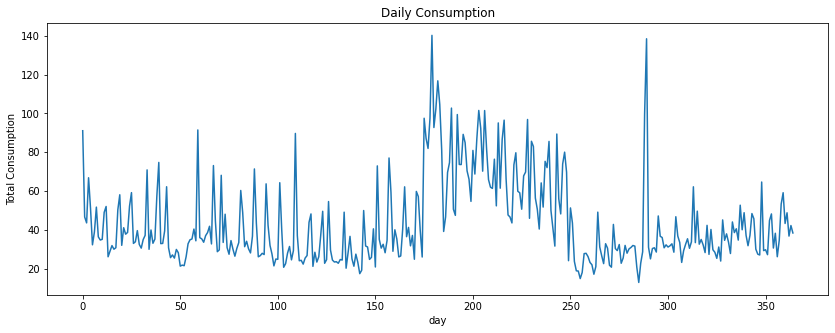

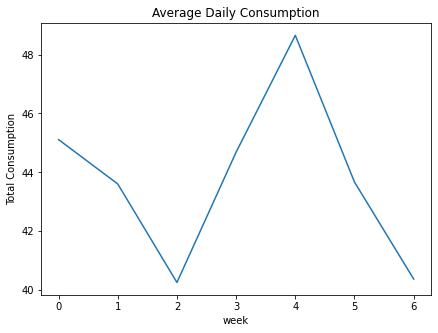

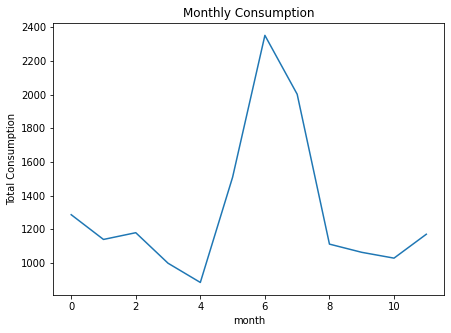

In [912]:
plt.figure(figsize=(14,5))
plt.plot(daily_consumption[:365])
plt.ylabel('Total Consumption')
plt.xlabel('day')
plt.title('Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(avg_daily_consumption)
plt.ylabel('Total Consumption')
plt.xlabel('week')
plt.title('Average Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(monthly_consumption)
plt.ylabel('Total Consumption')
plt.title('Monthly Consumption')
plt.xlabel('month')


In [0]:
mean_error=mean_absolute_error(merged_data[:4380]['Total Consumption'],merged_data[4380:]['Total Consumption'])

**Features Generation**

In [0]:

for i in range(merged_data.shape[0]):
  day = merged_data['time'][i].weekday()
  if day==5 or day==6:
    merged_data['weekend']=1
  else:
    merged_data['weekend']=0

for i in range(merged_data.shape[0]):
  time_time=merged_data['time'][i].hour
  if time_time>=23 and time_time<=7:
    merged_data['sleep']=1
  else:
    merged_data['sleep']=0
  
for i in range(merged_data.shape[0]):
  month=merged_data['time'][i].month
  if month <= 2 and month == 12:
    merged_data['season']=1
  elif month>=3 and month<=5:
    merged_data['season']=2
  elif month>= 6 and month<=8:
    merged_data['season']=3
  else:
    merged_data['season']=4


In [0]:
train_data,test_data,train_label,test_label=train_test_split(merged_data,merged_data['Total Consumption'],test_size=0.30)
features=['weekend','season','sleep'] 
train_data_final  = pd.DataFrame(data=train_data, columns=features)
train_label_final = train_data['Total Consumption']
test_data_final   = pd.DataFrame(data=test_data, columns=feature_names)
test_label_final  = test_data['Total Consumption']

**Linear Regression**

In [0]:
#Linear Regression
model1 = linear_model.LinearRegression().fit(train_data_final,train_label_final)
prediction_Linear = model1.predict(test_data_final)

**Random Forest**

In [0]:
# Random Forest
model2=RandomForestRegressor().fit(train_data_final, train_label_final)
prediction_Random_forest = model2.predict(test_data_final)

**XGBoost**

In [918]:
#XGBoost
model3 = XGBRegressor().fit(train_data_final, train_label_final)
prediction_XGB = model3.predict(test_data_final)

[02:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [919]:
print('Mean absolute error Naive method {0:.2f}'.format(mean_error))
print("Mean absolute error Linear Regression: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Linear)))
print("Mean absolute error Random Forest Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Random_forest)))
print("Mean absolute error XGB Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_XGB)))

Mean absolute error Naive method 1.53
Mean absolute error Linear Regression: 1.16437
Mean absolute error Random Forest Model: 1.16533
Mean absolute error XGB Model: 1.16436


# **Home C**

In [920]:
dataC_w=pd.read_csv('Home C -2015/homeC2015.csv')
dataC=pd.read_csv('Home C -2015/HomeC-meter1_2015.csv')

dataC['Total Consumption']=dataC.sum(axis = 1, skipna = True) 
data_weather=dataC_w.copy()
#data_weather['time'] = pd.to_datetime(data_weather['time'],unit='s')
#data_weather['time'] = pd.to_datetime(data_weather['time']) - timedelta(hours=4.5)

dataC_w['time'] = pd.to_datetime(dataC_w['time'],unit='s')
dataC_w['time'] = pd.to_datetime(dataC_w['time']) - timedelta(hours=5)
#total_data=pd.concat([dataC_w,data_weather])
dataC.rename(columns={'Date & Time':'time'},inplace=True)


dataC['time'] = pd.to_datetime(dataC['time'])
merged_data=pd.merge(dataC,dataC_w,on='time')
dataC['Total Consumption'].describe()

count    39764.000000
mean         2.521588
std          1.864932
min          0.004733
25%          1.267366
50%          2.045201
75%          3.148858
max         23.869100
Name: Total Consumption, dtype: float64

In [921]:
daily_consumption=[]
total_consumption=list(merged_data['Total Consumption'])
for i in range(0,merged_data.shape[0],24):
    sum1=0
    for j in range(i,i+24):
        sum1+=total_consumption[j]
    daily_consumption.append(sum1)
print(len(daily_consumption))

365


In [0]:
avg_daily_consumption=[0,0,0,0,0,0,0]
for i in range(7):
    daily_consumption.append(0)
for i in range(0,366,7):
    avg_daily_consumption[0]+=daily_consumption[i]
    avg_daily_consumption[1]+=daily_consumption[i+1]
    avg_daily_consumption[2]+=daily_consumption[i+2]
    avg_daily_consumption[3]+=daily_consumption[i+3]
    avg_daily_consumption[4]+=daily_consumption[i+4]
    avg_daily_consumption[5]+=daily_consumption[i+5]
    avg_daily_consumption[6]+=daily_consumption[i+6]
for i in range(7):
    avg_daily_consumption[i]/=52


In [0]:
monthly_consumption=[]
for i in range(0,336,30):
    sum1=0
    for j in range(i,i+30):
        sum1+=daily_consumption[j]
    monthly_consumption.append(sum1)

Text(0.5, 0, 'month')

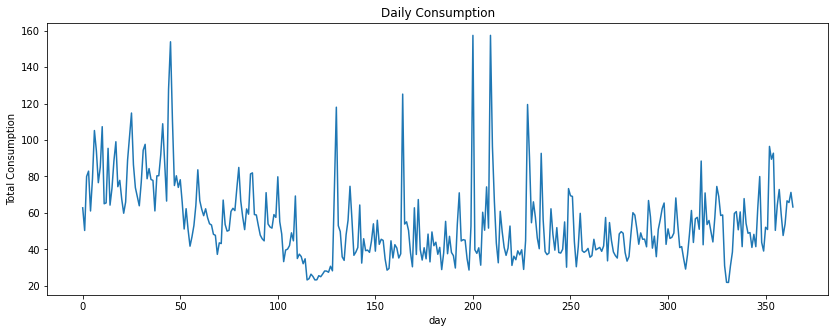

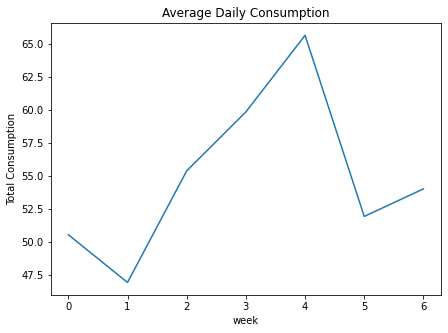

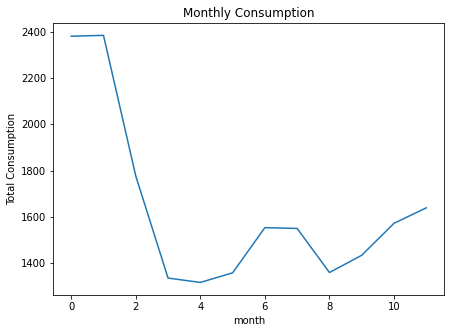

In [924]:
plt.figure(figsize=(14,5))
plt.plot(daily_consumption[:365])
plt.ylabel('Total Consumption')
plt.xlabel('day')
plt.title('Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(avg_daily_consumption)
plt.ylabel('Total Consumption')
plt.xlabel('week')
plt.title('Average Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(monthly_consumption)
plt.ylabel('Total Consumption')
plt.title('Monthly Consumption')
plt.xlabel('month')


In [0]:
mean_error=mean_absolute_error(merged_data[:4380]['Total Consumption'],merged_data[4380:]['Total Consumption'])

**Features Generation**

In [0]:

for i in range(merged_data.shape[0]):
  day = merged_data['time'][i].weekday()
  if day==5 or day==6:
    merged_data['weekend']=1
  else:
    merged_data['weekend']=0

for i in range(merged_data.shape[0]):
  time_time=merged_data['time'][i].hour
  if time_time>=23 and time_time<=7:
    merged_data['sleep']=1
  else:
    merged_data['sleep']=0
  
for i in range(merged_data.shape[0]):
  month=merged_data['time'][i].month
  if month <= 2 and month == 12:
    merged_data['season']=1
  elif month>=3 and month<=5:
    merged_data['season']=2
  elif month>= 6 and month<=8:
    merged_data['season']=3
  else:
    merged_data['season']=4


In [0]:
train_data,test_data,train_label,test_label=train_test_split(merged_data,merged_data['Total Consumption'],test_size=0.30)
features=['weekend','season','sleep'] 
train_data_final  = pd.DataFrame(data=train_data, columns=features)
train_label_final = train_data['Total Consumption']
test_data_final   = pd.DataFrame(data=test_data, columns=feature_names)
test_label_final  = test_data['Total Consumption']


**Linear Regression**

In [0]:
#Linear Regression

model1 = linear_model.LinearRegression().fit(train_data_final,train_label_final)
prediction_Linear = model1.predict(test_data_final)

**Random Forest**

In [0]:
# Random Forest

model2=RandomForestRegressor().fit(train_data_final, train_label_final)
prediction_Random_forest = model2.predict(test_data_final)


**XGBoost**

In [930]:
#XGBoost
model3 = XGBRegressor()
model3.fit(train_data_final, train_label_final)
prediction_XGB = model3.predict(test_data_final)


[02:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [931]:
print('Mean absolute error Naive method {0:.2f}'.format(mean_error))
print("Mean absolute error Linear Regression: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Linear)))
print("Mean absolute error Random Forest Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Random_forest)))
print("Mean absolute error XGB Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_XGB)))

Mean absolute error Naive method 1.54
Mean absolute error Linear Regression: 1.11119
Mean absolute error Random Forest Model: 1.11050
Mean absolute error XGB Model: 1.11118


# **Home F** 

In [932]:
dataF_w=pd.read_csv('Home F - 2016/homeF2016.csv')
dataF=pd.read_csv('Home F - 2016/HomeF-meter3_2016.csv')

dataF['Total Consumption']=dataF.sum(axis = 1, skipna = True) 
data_weather=dataF_w.copy()
data_weather['time'] = pd.to_datetime(data_weather['time'],unit='s')
data_weather['time'] = pd.to_datetime(data_weather['time']) - timedelta(hours=4.5)

dataF_w['time'] = pd.to_datetime(dataF_w['time'],unit='s')
dataF_w['time'] = pd.to_datetime(dataF_w['time']) - timedelta(hours=5)
total_data=pd.concat([dataF_w,data_weather])
dataF.rename(columns={'Date & Time':'time'},inplace=True)


dataF['time'] = pd.to_datetime(dataF['time'])
merged_data=pd.merge(dataF,total_data,on='time')
dataF['Total Consumption'].describe()

count    503925.000000
mean          8.745720
std           8.940912
min           0.002333
25%           1.776333
50%           4.389483
75%          15.812367
max        1385.367333
Name: Total Consumption, dtype: float64

In [933]:
daily_consumption=[]
total_consumption=list(merged_data['Total Consumption'])
for i in range(0,merged_data.shape[0],48):
    sum1=0
    for j in range(i,i+48):
      if j==merged_data.shape[0]-1:
        break
      sum1+=total_consumption[j]
    daily_consumption.append(sum1)
print(len(daily_consumption))

350


In [934]:
avg_daily_consumption=[0,0,0,0,0,0,0]
for i in range(7):
    daily_consumption.append(0)
for i in range(0,175,7):
    avg_daily_consumption[0]+=daily_consumption[i]
    avg_daily_consumption[1]+=daily_consumption[i+1]
    avg_daily_consumption[2]+=daily_consumption[i+2]
    avg_daily_consumption[3]+=daily_consumption[i+3]
    avg_daily_consumption[4]+=daily_consumption[i+4]
    avg_daily_consumption[5]+=daily_consumption[i+5]
    avg_daily_consumption[6]+=daily_consumption[i+6]
for i in range(7):
    avg_daily_consumption[i]/=52

print(avg_daily_consumption)


[198.34475481130767, 173.05369391378846, 163.40678878615384, 195.88891442601928, 201.83618109236536, 217.69557404165383, 218.48835096471157]


In [935]:
monthly_consumption=[]
for i in range(0,337,30):
    sum1=0
    for j in range(i,i+30):
      if j==350:
        break
      sum1+=daily_consumption[j]
    monthly_consumption.append(sum1)
print((monthly_consumption))

[11003.495133533002, 10505.954733568999, 12561.898533579004, 12761.881833631996, 11725.492916608002, 15188.702333679998, 14314.632216992004, 14570.604616820001, 14225.864366688998, 12347.874199877999, 10197.628250202997, 6065.768400237001]


Text(0.5, 0, 'month')

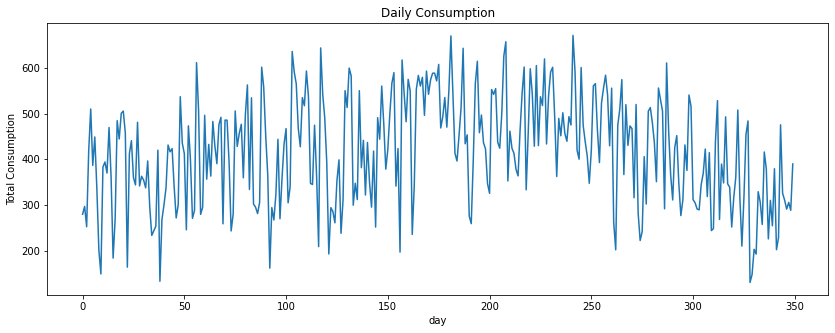

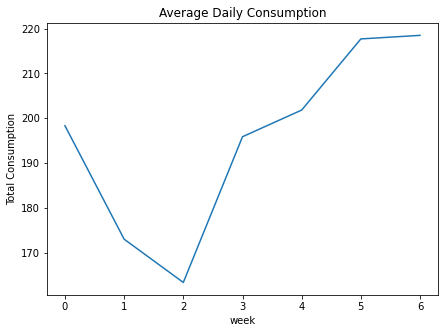

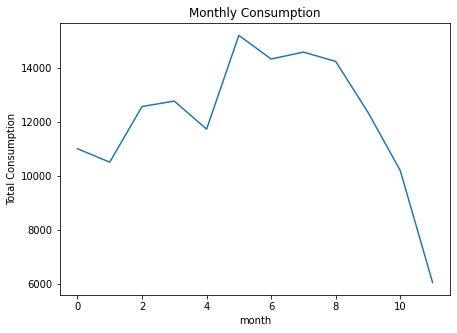

In [936]:
plt.figure(figsize=(14,5))
plt.plot(daily_consumption[:350])
plt.ylabel('Total Consumption')
plt.xlabel('day')
plt.title('Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(avg_daily_consumption)
plt.ylabel('Total Consumption')
plt.xlabel('week')
plt.title('Average Daily Consumption')
plt.figure(figsize=(7,5))
plt.plot(monthly_consumption)
plt.ylabel('Total Consumption')
plt.title('Monthly Consumption')
plt.xlabel('month')


In [0]:
mean_error=mean_absolute_error(merged_data[:48]['Total Consumption'],merged_data[48:96]['Total Consumption'])

**Features Generation**

In [0]:

for i in range(merged_data.shape[0]):
  day = merged_data['time'][i].weekday()
  if day==5 or day==6:
    merged_data['weekend']=1
  else:
    merged_data['weekend']=0

for i in range(merged_data.shape[0]):
  time_time=merged_data['time'][i].hour
  if time_time>=23 and time_time<=7:
    merged_data['sleep']=1
  else:
    merged_data['sleep']=0
  
for i in range(merged_data.shape[0]):
  month=merged_data['time'][i].month
  if month <= 2 and month == 12:
    merged_data['season']=1
  elif month>=3 and month<=5:
    merged_data['season']=2
  elif month>= 6 and month<=8:
    merged_data['season']=3
  else:
    merged_data['season']=4


In [0]:
train_data,test_data,train_label,test_label=train_test_split(merged_data,merged_data['Total Consumption'],test_size=0.30)
features=['weekend','season','sleep'] 
train_data_final  = pd.DataFrame(data=train_data, columns=features)
train_label_final = train_data['Total Consumption']
test_data_final   = pd.DataFrame(data=test_data, columns=feature_names)
test_label_final  = test_data['Total Consumption']


**Linear Regression**

In [0]:
#Linear Regression

model1 = linear_model.LinearRegression().fit(train_data_final,train_label_final)
prediction_Linear = model1.predict(test_data_final)

**Random Forest**

In [0]:
# Random Forest

model2=RandomForestRegressor().fit(train_data_final, train_label_final)
prediction_Random_forest = model2.predict(test_data_final)

**XGBoost**

In [942]:
#XGBoost

model3 = XGBRegressor().fit(train_data_final, train_label_final)
prediction_XGB = model3.predict(test_data_final)

[02:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [943]:
print('Mean absolute error Naive method {0:.2f}'.format(mean_error))
print("Mean absolute error Linear Regression: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Linear)))
print("Mean absolute error Random Forest Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_Random_forest)))
print("Mean absolute error XGB Model: {0:.5f}".format(mean_absolute_error(test_label_final, prediction_XGB)))

Mean absolute error Naive method 5.07
Mean absolute error Linear Regression: 7.22297
Mean absolute error Random Forest Model: 7.22260
Mean absolute error XGB Model: 7.22292
